In [1]:
# Quant Project : Linear Regression Modeling for predicting the Stock Price and testing all the assumptions

# Step 1: Download the data from Yahoo Finance
# Step 2: Some Feature Engineering (to build new features) - Technical In
# Step 3: Run Linear Regression Model
# Step 4: Check how the model is performed (Actual vs Predicted)
# Step 5: Test for all the assumptions
# Step 6: Check the prediction

In [2]:
# Install:
# !pip install yfinance 

In [3]:
import yfinance as yf

In [4]:
# Step 1: Download the data from Yahoo Finance
tickers = ['AAPL', 'AMZN', 'MSFT', 'QQQ', '^GSPC']
df = yf.download(tickers, start = '2020-01-01', end = '2024-12-31')['Close']
df

C:\Users\Naitik Patel\AppData\Local\Temp\ipykernel_23160\4252281833.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start = '2020-01-01', end = '2024-12-31')['Close']
[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC
Date,,,,,
2020-01-02,72.468254,94.900497,152.505661,208.848938,3257.850098
2020-01-03,71.763710,93.748497,150.606735,206.935959,3234.850098
2020-01-06,72.335564,95.143997,150.996033,208.269226,3246.280029
2020-01-07,71.995346,95.343002,149.619263,208.240280,3237.179932
2020-01-08,73.153496,94.598503,152.002487,209.805435,3253.050049
...,...,...,...,...,...
2024-12-23,254.120697,225.059998,432.062775,520.901855,5974.069824
2024-12-24,257.037506,229.050003,436.112885,527.965210,6040.040039
2024-12-26,257.853760,227.050003,434.901794,527.606567,6037.589844


In [5]:
# Step 2: Perform Feature Engineering
# Lesson: To predict AAPL Stock price, we have to consider yesterday's price (all stocks)
# The market is not open yet so we don't know what's the price today

# Considering Yesterday's Value
df['AAPL(t-1)'] = df['AAPL'].shift(1)
df['AMZN(t-1)'] = df['AMZN'].shift(1)
df['MSFT(t-1)'] = df['MSFT'].shift(1)
df['QQQ(t-1)'] = df['QQQ'].shift(1)
df['^GSPC(t-1)'] = df['^GSPC'].shift(1)

# Moving Avg (MA): Technical Indicator - It helps you understand the short term trend
df['AAPL_MA_5'] = df['AAPL'].rolling(window=5).mean()
df['AMZN_MA_5'] = df['AMZN'].rolling(window=5).mean()
df['MSFT_MA_5'] = df['MSFT'].rolling(window=5).mean()
df['QQQ_MA_5'] = df['QQQ'].rolling(window=5).mean()
df['^GSPC_MA_5'] = df['^GSPC'].rolling(window=5).mean()

# Set Y Variable - Next day
df['Target'] = df['AAPL'].shift(-1)
df = df.dropna()

In [6]:
df.columns

Index(['AAPL', 'AMZN', 'MSFT', 'QQQ', '^GSPC', 'AAPL(t-1)', 'AMZN(t-1)',
       'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL_MA_5', 'AMZN_MA_5',
       'MSFT_MA_5', 'QQQ_MA_5', '^GSPC_MA_5', 'Target'],
      dtype='object', name='Ticker')

In [7]:
# Y = Intercept + B1*X1 + B2*X2 + B3*X3

In [8]:
# Step 3: Fit a Linear Regression Model
# Set X and Y variable for Linear Regression Model - Ordinary Least Square
import statsmodels.api as sm
X = df[['AAPL(t-1)', 'AMZN(t-1)',
 'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL_MA_5', 'AMZN_MA_5',
 'MSFT_MA_5', 'QQQ_MA_5', '^GSPC_MA_5']]
Y = df['Target']
X_const = sm.add_constant(X) # Intercept Term

# Train the Model
model = sm.OLS(Y, X_const).fit()

# Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.644e+04
Date:                Thu, 27 Nov 2025   Prob (F-statistic):               0.00
Time:                        21:53:02   Log-Likelihood:                -3381.3
No. Observations:                1252   AIC:                             6785.
Df Residuals:                    1241   BIC:                             6841.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5099      1.143      0.446      0.656      -1.733       2.753
AAPL(t-1)      0.4682      0.081      5.764      0.000       0.309       0.628
AMZN(t-1)      0.0645      0.067      0.958      0.338      -0.068       0.196
MSFT(t-1)     -0.0165      0.052     -0.314      0.753      -0.119       0.086
QQQ(t-1)       0.0090      0.101      0.089      0.929      -0.190       0.208
^GSPC(t-1)     0.0053      0.007      0.734      0.463      -0.009       0.019
AAPL_MA_5      0.5158      0.082      6.279      0.000       0.355       0.677
AMZN_MA_5     -0.0592      0.068     -0.866      0.386      -0.193       0.075
MSFT_MA_5      0.0281      0.053      0.531      0.595      -0.076       0.132
QQQ_MA_5      -0.0099      0.104     -0.096      0.924      -0.213       0.193
^GSPC_MA_5    -0.0056      0.007     -0.776      0.438      -0.020       0.009
==============================================================================
Omnibus:                       26.037   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.707
Skew:                          -0.085   Prob(JB):                     1.61e-11
Kurtosis:                       3.961   Cond. No.                     6.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# P value < 0.05 = Variable is significant => Keep that variable
# P value > 0.05 = Variable is not significant => Drop that variable

In [10]:
# Set X and Y variable for Linear Regression Model - Ordinary Least Square
import statsmodels.api as sm
X = df[['AAPL(t-1)', '^GSPC(t-1)']] # Dropping AAPL_MA_5
Y = df['Target']
X_const = sm.add_constant(X) # Intercept Term

# Train the Model
model = sm.OLS(Y, X_const).fit()

# Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 7.762e+04
Date:                Thu, 27 Nov 2025   Prob (F-statistic):               0.00
Time:                        21:53:23   Log-Likelihood:                -3420.7
No. Observations:                1252   AIC:                             6847.
Df Residuals:                    1249   BIC:                             6863.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7172      0.748     -0.959      0.338      -2.185       0.750
AAPL(t-1)      0.9840      0.007    140.621      0.000       0.970       0.998
^GSPC(t-1)     0.0008      0.000      2.114      0.035     5.8e-05       0.002
==============================================================================
Omnibus:                       40.865   Durbin-Watson:                   1.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.864
Skew:                          -0.036   Prob(JB):                     2.79e-23
Kurtosis:                       4.409   Cond. No.                     3.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
import pandas as pd
df_train_predict = pd.DataFrame()
df_train_predict['Actual'] = df['Target']
df_train_predict['Predicted'] = model.predict(X_const)
df_train_predict

,Actual,Predicted
Date,,
2020-01-08,74.707336,72.734126
2020-01-09,74.876221,73.886537
2020-01-10,76.475914,75.432966
2020-01-13,75.443207,75.591618
2020-01-14,75.119926,77.184077
...,...,...
2024-12-20,254.120697,248.697013
2024-12-23,257.037506,253.352414
2024-12-24,257.853760,254.151297


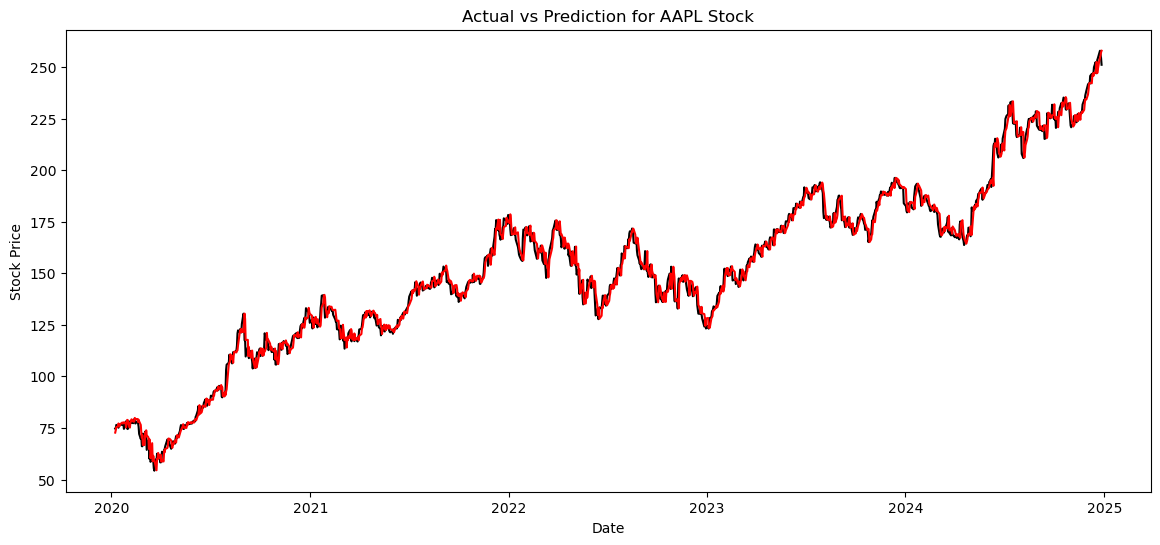

In [12]:
# Plot between Actual vs Predicted Value
import matplotlib.pyplot as plt
plt.figure(figsize = (14,6))
plt.plot(df_train_predict.index, df_train_predict['Actual'], label = 'Actual', color = 'black')
plt.plot(df_train_predict.index, df_train_predict['Predicted'], label = 'predicted', color = 'red')
plt.title("Actual vs Prediction for AAPL Stock")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

In [13]:
# Testing LR Assumptions 
# Checking how the model is performing on tested data

In [14]:
# Linear Regression: (Given the dataset here)
# Step 1: Train the Model
# Step 2: Test the Model

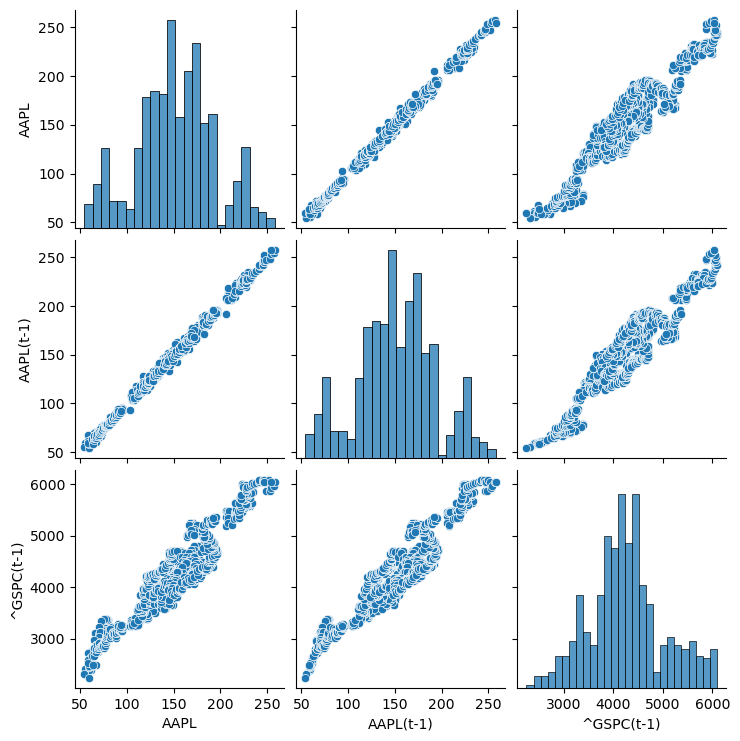

In [15]:
# Assumptions of Linear Regression:
# 1) Linearity between dependent and independent variable - Met
import seaborn as sns
df = df[['AAPL', 'AAPL(t-1)', '^GSPC(t-1)']]
sns.pairplot(df)
# AAPL & AAPL(t-1) has linear relationship
# AAPL & S&P500 has linear relationship
# AAPL & AAPL_MA_5 has linear relationship

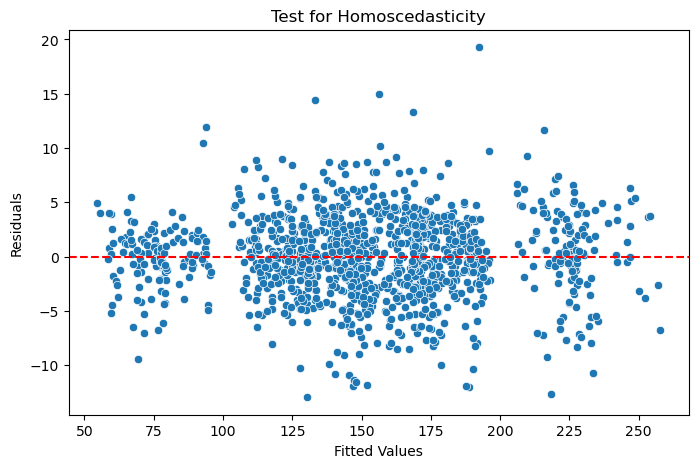

In [16]:
# 2) Homoscedasticity: Fitting Residual with the predicted value

residual = model.resid # Actual - Predicted
fitted = model.fittedvalues # Predicted Y Value

plt.figure(figsize = (8,5))
sns.scatterplot(x = fitted, y = residual)
plt.axhline(0, color = 'red', linestyle = '--')
plt.title('Test for Homoscedasticity')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Since it's a tube like structure => It is homoscedastic -> Assumption is met
# If it was funnel like structure => It is heteroscedastic

In [17]:
X_const.columns

Index(['const', 'AAPL(t-1)', '^GSPC(t-1)'], dtype='object')

In [18]:
# 3) Multicollinearity => VIF (Variance Inflation Factor) => For independent
# Rule of thumb for VIF
# VIF < 1 => No Multicollinearity
# VIF < 10 => Moderate Multicollinearity
# VIF > 10 => Strong Multicollinearity
# VIF = Condition is Met
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_const.columns
vif['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(df.shape[1])]
vif = vif[1:]
vif

,Features,VIF
1,AAPL(t-1),7.634911
2,^GSPC(t-1),7.634911


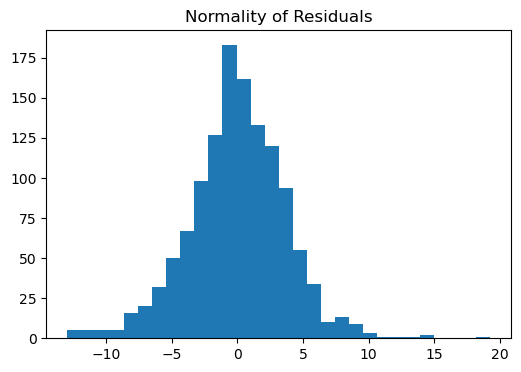

In [19]:
# 4) Assumption: Normality of Residual => 1) Visual Test (Histogram) or QQ plot
plt.figure(figsize = (6,4))
plt.hist(residual, bins = 30)
plt.title("Normality of Residuals")
plt.show()

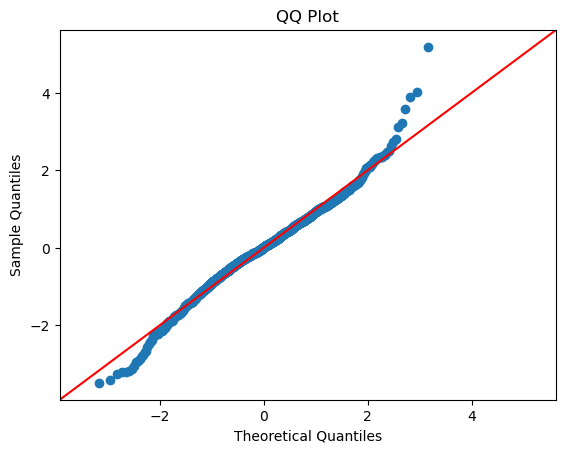

In [20]:
# QQ Plot for testing Normality of Residuals
import statsmodels.api as sm
sm.qqplot(residual, line = '45', fit = True)
plt.title('QQ Plot')
plt.show()

In [21]:
# Test 5: Auto correlation of Residual: Durbin Watson Test

from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residual)
dw # p value

# p value < 0.05 => Autocorrelation b/w residual is there
# p value > 0.05 => Autocorrelation b/w residual is not there
# Our 5th condition is met

np.float64(1.0410069425624886)

In [22]:
# All the 5 conditions of Linear Regression Modela are MET
# Linearity
# Homoscedasticity
# VIF
# Normality of Residuals
# Auto correlation of Residual

In [23]:
# Predict the Stock Price for the Year 2025

In [24]:
# Step 1: Download the data from Yahoo Finance
tickers = ['AAPL', '^GSPC']
df = yf.download(tickers, start = '2025-01-01', end = '2025-03-31')['Close']
df.head()

C:\Users\Naitik Patel\AppData\Local\Temp\ipykernel_23160\2471956868.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start = '2025-01-01', end = '2025-03-31')['Close']
[*********************100%***********************]  2 of 2 completed


Ticker,AAPL,^GSPC
Date,,
2025-01-02,242.752090,5868.549805
2025-01-03,242.264282,5942.470215
2025-01-06,243.896927,5975.379883
2025-01-07,241.119476,5909.029785
2025-01-08,241.607269,5918.250000


In [25]:
# Step 2: Data Eng
df['AAPL(t-1)'] = df['AAPL'].shift(1)
df['^GSPC(t-1)'] = df['^GSPC'].shift(1)
df = df.dropna()
df.head()

Ticker,AAPL,^GSPC,AAPL(t-1),^GSPC(t-1)
Date,,,,
2025-01-03,242.264282,5942.470215,242.752090,5868.549805
2025-01-06,243.896927,5975.379883,242.264282,5942.470215
2025-01-07,241.119476,5909.029785,243.896927,5975.379883
2025-01-08,241.607269,5918.250000,241.119476,5909.029785
2025-01-10,235.783615,5827.040039,241.607269,5918.250000


In [26]:
X_test = df[['AAPL(t-1)', '^GSPC(t-1)']]
X_test = sm.add_constant(X_test)
df_result = pd.DataFrame()
df_result['Actual'] = df['AAPL']
df_result['Predicted'] = model.predict(X_test)
df_result.head()

,Actual,Predicted
Date,,
2025-01-03,242.264282,242.879509
2025-01-06,243.896927,242.459040
2025-01-07,241.119476,244.092082
2025-01-08,241.607269,241.305608
2025-01-10,235.783615,241.793027


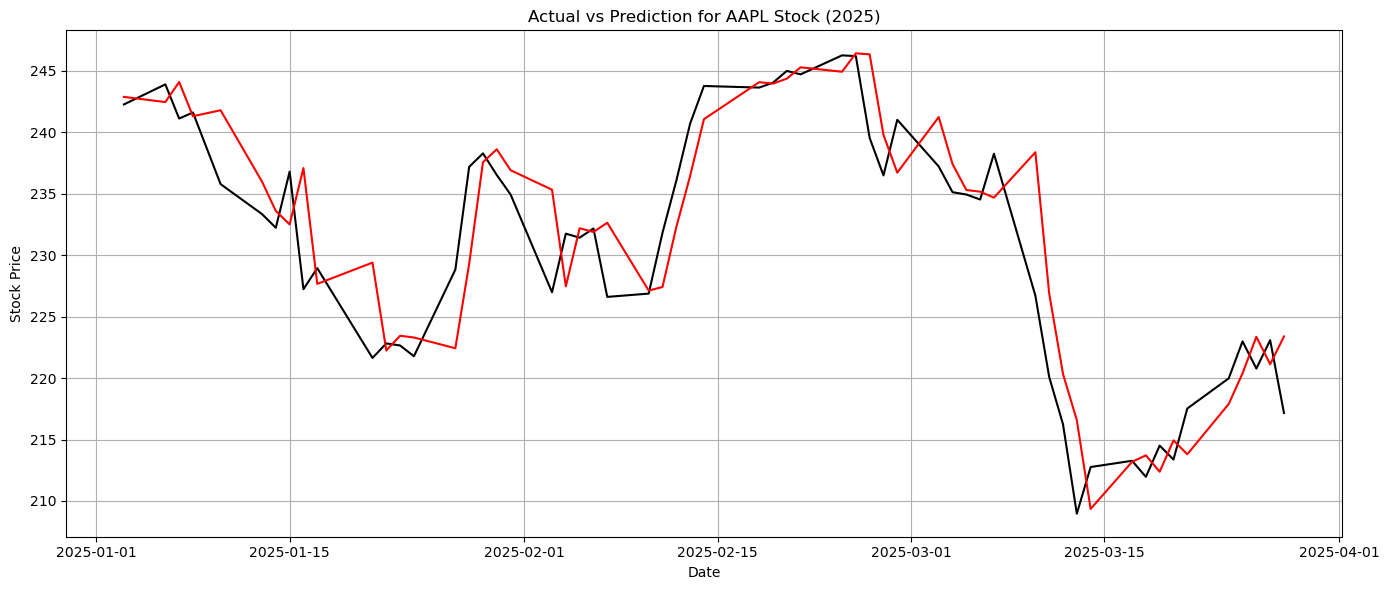

In [27]:
# Plot between Actual vs Predicted Value
import matplotlib.pyplot as plt
plt.figure(figsize = (14,6))
plt.plot(df_result.index, df_result['Actual'], label = 'Actual', color = 'black')
plt.plot(df_result.index, df_result['Predicted'], label = 'Predicted', color = 'red')
plt.title("Actual vs Prediction for AAPL Stock (2025)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
# Risk Metrics
# Calculate rmse and mse
# rmse = root mean square error => Sq root(Avg((A - P)^2))
# mse = mean square error => Avg((A - P)^2)
from sklearn.metrics import mean_squared_error
import numpy as np
# Calculate mse
mse = mean_squared_error(df_result['Actual'], df_result['Predicted'])
rmse = np.sqrt(mse)
print(rmse, mse)

4.151407648101917 17.234185460719086


In [29]:
# Conclusion: It's a decent Model but not 100% Accurate
# Lesson: Stock data in general have lot of non linearities
# It's extremely tough to use simple linear regression model just to capture the non linear effect
# That's why in the industry it's common to use ML Models which are great in capturing Non Linearities.

**Step 1: Download the Data**

In [30]:
# Step 1: Download the data from Yahoo Finance till date
tickers = ['AAPL', 'AMZN', 'MSFT', 'QQQ', '^GSPC']
df = yf.download(tickers, start = '2020-01-01', end = '2025-04-01')['Close']
df

C:\Users\Naitik Patel\AppData\Local\Temp\ipykernel_23160\198697064.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start = '2020-01-01', end = '2025-04-01')['Close']
[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC
Date,,,,,
2020-01-02,72.468269,94.900497,152.505676,208.848938,3257.850098
2020-01-03,71.763718,93.748497,150.606720,206.935913,3234.850098
2020-01-06,72.335541,95.143997,150.996002,208.269226,3246.280029
2020-01-07,71.995369,95.343002,149.619232,208.240250,3237.179932
2020-01-08,73.153488,94.598503,152.002441,209.805481,3253.050049
...,...,...,...,...,...
2025-03-25,222.987488,205.710007,393.052887,492.335663,5776.649902
2025-03-26,220.775055,201.130005,387.890564,483.276367,5712.200195
2025-03-27,223.087173,201.360001,388.497284,480.522644,5693.310059


**Step 2: Feature Engineering**

In [31]:
# Step 2: Perform Feature Engineering
# Lesson: To predict AAPL Stock price, we have to consider yesterday's price(all stocks)
# The market is not open yet so we don't know what's the price today

# Considering Yesterday's Value
df['AAPL(t-1)'] = df['AAPL'].shift(1)
df['AMZN(t-1)'] = df['AMZN'].shift(1)
df['MSFT(t-1)'] = df['MSFT'].shift(1)
df['QQQ(t-1)'] = df['QQQ'].shift(1)
df['^GSPC(t-1)'] = df['^GSPC'].shift(1)

# Moving Avg (MA): Technical Indicator - It helps you understand the short term trend
df['AAPL_MA_5'] = df['AAPL'].rolling(window=5).mean()
df['AMZN_MA_5'] = df['AMZN'].rolling(window=5).mean()
df['MSFT_MA_5'] = df['MSFT'].rolling(window=5).mean()
df['QQQ_MA_5'] = df['QQQ'].rolling(window=5).mean()
df['^GSPC_MA_5'] = df['^GSPC'].rolling(window=5).mean()

# Set Y Variable - Next day
df['Target'] = df['AAPL'].shift(-1)
df = df.dropna()
df

Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC,AAPL(t-1),AMZN(t-1),MSFT(t-1),QQQ(t-1),^GSPC(t-1),AAPL_MA_5,AMZN_MA_5,MSFT_MA_5,QQQ_MA_5,^GSPC_MA_5,Target
Date,,,,,,,,,,,,,,,,
2020-01-08,73.153488,94.598503,152.002441,209.805481,3253.050049,71.995369,95.343002,149.619232,208.240250,3237.179932,72.343277,94.746899,151.146014,208.419962,3245.842041,74.707321
2020-01-09,74.707321,95.052498,153.901413,211.583206,3274.699951,73.153488,94.598503,152.002441,209.805481,3253.050049,72.791087,94.777299,151.425162,208.966815,3249.212012,74.876205
2020-01-10,74.876205,94.157997,153.189331,211.042175,3265.350098,74.707321,95.052498,153.901413,211.583206,3274.699951,73.413585,94.859200,151.941684,209.788068,3255.312012,76.475914
2020-01-13,76.475914,94.565002,155.031357,213.476974,3288.129883,74.876205,94.157997,153.189331,211.042175,3265.350098,74.241660,94.743401,152.748755,210.829617,3263.681982,75.443230
2020-01-14,75.443230,93.472000,153.939423,212.636322,3283.149902,76.475914,94.565002,155.031357,213.476974,3288.129883,74.931232,94.369200,153.612793,211.708832,3272.875977,75.119904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,219.977783,203.259995,390.983948,489.542053,5767.569824,217.526184,196.210007,389.173676,479.030060,5667.560059,215.469208,196.556000,386.432367,479.572369,5677.594043,222.987488
2025-03-25,222.987488,205.710007,393.052887,492.335663,5776.649902,219.977783,203.259995,390.983948,489.542053,5767.569824,217.673666,199.134000,388.747955,483.488745,5709.991992,220.775055
2025-03-26,220.775055,201.130005,387.890564,483.276367,5712.200195,222.987488,205.710007,393.052887,492.335663,5776.649902,218.927377,200.252002,389.175665,484.328040,5717.374023,223.087173


**Step 3:  Lasso Regression**

In [32]:
# Step 1: Import all the required libraries
# Step 2: Define Features and Target Variables
# Step 3: Train Test Split
# Step 4: Apply Lasso Regression
# Step 5: Get Intercept and Coeff for Lasso Regression
# Step 6: Predict using Lasso Regression
# Step 7: Create a dataframe with Actual and Predicted Values
# Step 8: Plot Actual & Predicted Values
# Step 9: Evaluate the Model - R square, mse, rmse

In [33]:
# Step 1: Import all the required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [34]:
# Step 2: Define Features and Target Variables
X = df[['AAPL(t-1)', 'AMZN(t-1)',
 'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL_MA_5', 'AMZN_MA_5',
 'MSFT_MA_5', 'QQQ_MA_5', '^GSPC_MA_5']]
Y = df['Target']

In [35]:
# Step 3: Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.05, shuffle = False)

In [36]:
# Step 4: Apply Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 10)
lasso.fit(X_train, Y_train) # Train the model

Lasso(alpha=10)

In [38]:
# Step 5: Get Intercept and Coeff for Lasso Regression
coefficients = lasso.coef_
coefficients
intercept = lasso.intercept_
intercept
coeff_df = pd.DataFrame({'Feature':X.columns, 'Coefficients':coefficients})
coeff_df

,Feature,Coefficients
0,AAPL(t-1),0.572383
1,AMZN(t-1),-0.000000
2,MSFT(t-1),0.005861
3,QQQ(t-1),0.000000
4,^GSPC(t-1),0.002477
5,AAPL_MA_5,0.367689
6,AMZN_MA_5,-0.000000
7,MSFT_MA_5,0.000000
8,QQQ_MA_5,0.000000
9,^GSPC_MA_5,0.000000


In [39]:
# Step 6: Predict using Lasso Regression
y_pred = lasso.predict(X_test)
y_pred

array([248.6080527 , 251.75127033, 252.6404723 , 255.30023259,
       256.17890798, 253.84736885, 251.36921455, 249.22237846,
       244.28294507, 243.43935918, 243.75020324, 241.39904409,
       241.20138471, 236.95350471, 234.71199263, 233.76382816,
       235.6490917 , 229.62912302, 229.92111388, 225.17409617,
       225.00687421, 224.59192079, 224.02299619, 228.9250764 ,
       235.05917017, 236.60706013, 236.48613963, 235.36922109,
       230.27882266, 232.61952246, 232.17539354, 232.05945219,
       228.68825101, 228.96238477, 232.13918315, 235.1363897 ,
       239.22164109, 242.19222119, 243.05989379, 244.01064202,
       244.79968093, 244.5184127 , 245.49237139, 245.02269592,
       240.59974922, 238.30628154, 240.48753312, 237.19085184,
       235.4777592 , 235.45708577, 234.73823712, 236.15607705,
       227.97663618, 222.71054149, 218.71274619, 212.45497826,
       213.9883781 , 213.77244546, 212.71769414, 214.67148574,
       214.33507086, 217.24434444, 219.71650693, 221.93

In [40]:
# Step 7: Create a dataframe with Actual and Predicted Values
df_result = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df_result

,Actual,Predicted
Date,,
2024-12-20,254.120682,248.608053
2024-12-23,257.037476,251.751270
2024-12-24,257.853790,252.640472
2024-12-26,254.439224,255.300233
2024-12-27,251.064484,256.178908
...,...,...
2025-03-24,222.987488,217.244344
2025-03-25,220.775055,219.716507
2025-03-26,223.087173,221.934806


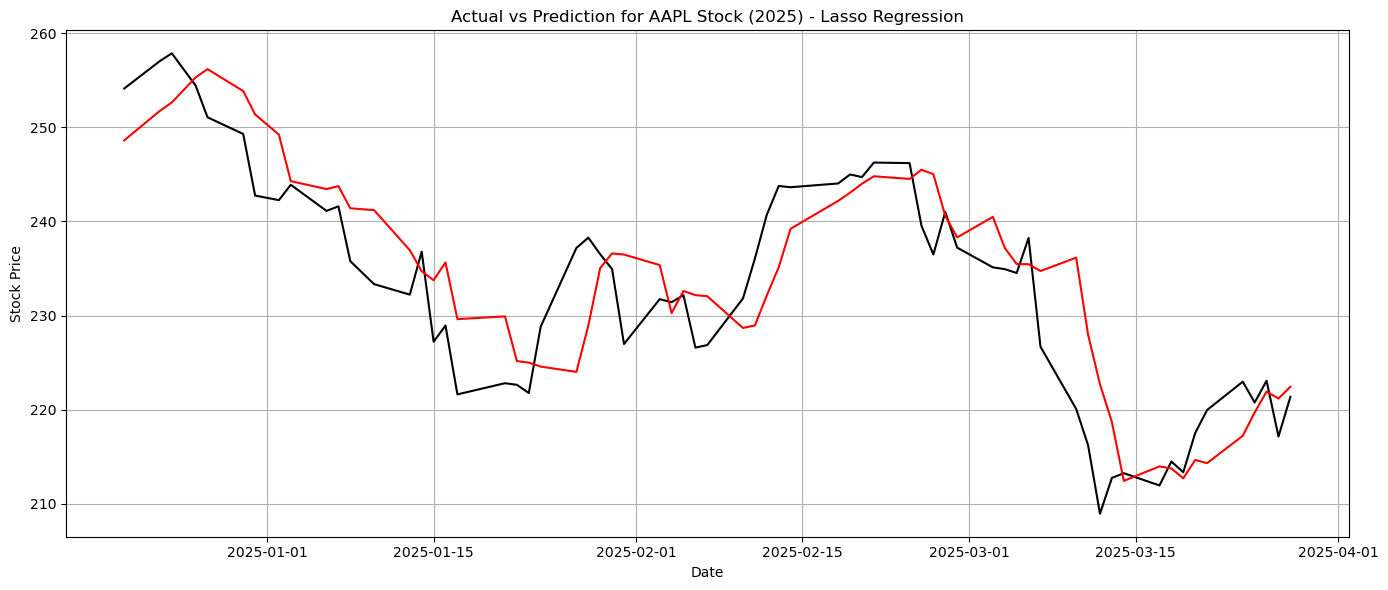

In [42]:
# Step 8: Plot Actual & Predicted Values
import matplotlib.pyplot as plt
plt.figure(figsize = (14,6))
plt.plot(df_result.index, df_result['Actual'], label = 'Actual', color = 'black')
plt.plot(df_result.index, df_result['Predicted'], label = 'Predicted', color = 'red')
plt.title("Actual vs Prediction for AAPL Stock (2025) - Lasso Regression")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
# Step 9: Evaluate the Model - R square, mse, rmse
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(Y_test, y_pred)
print("R square", r2)

mse = mean_squared_error(Y_test, y_pred)
print("mse",mse)

rmse = np.sqrt(mse)
print("rmse", rmse)

R square 0.7598467331022811
mse 33.739150776404536
rmse 5.808541191762742


**Step 3: Ridge Regression**

In [47]:
# Step 1: Import all the required libraries
# Step 2: Define Features and Target Variables
# Step 3: Train Test Split
# Step 4: Apply Ridge Regression
# Step 5: Get Intercept and Coeff for Ridge Regression
# Step 6: Predict using Ridge Regression
# Step 7: Create a dataframe with Actual and Predicted Values
# Step 8: Plot Actual & Predicted Values
# Step 9: Evaluate the Model - R square, mse, rmse

In [48]:
# Step 1: Import all the required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [49]:
# Step 2: Define Features and Target Variables
X = df[['AAPL(t-1)', 'AMZN(t-1)',
 'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL_MA_5', 'AMZN_MA_5',
 'MSFT_MA_5', 'QQQ_MA_5', '^GSPC_MA_5']]

Y = df['Target']

In [50]:
# Step 3: Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.05, shuffle = False)

In [51]:
# Step 4: Apply Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 10)
ridge.fit(X_train, Y_train) # Train the model

Ridge(alpha=10)

In [54]:
# Step 5: Get Intercept and Coeff for Lasso Regression

coefficients = ridge.coef_
coefficients
intercept = ridge.intercept_
intercept
coeff_df = pd.DataFrame({'Feature':X.columns, 'Coefficients':coefficients})
coeff_df

,Feature,Coefficients
0,AAPL(t-1),0.450883
1,AMZN(t-1),0.054194
2,MSFT(t-1),-0.017329
3,QQQ(t-1),0.034636
4,^GSPC(t-1),0.004581
5,AAPL_MA_5,0.532348
6,AMZN_MA_5,-0.049368
7,MSFT_MA_5,0.029190
8,QQQ_MA_5,-0.035654
9,^GSPC_MA_5,-0.004918


In [53]:
# Step 6: Predict using Ridge Regression
y_pred = ridge.predict(X_test)
y_pred

array([248.81023001, 252.09460933, 253.32667555, 256.17521692,
       256.83722977, 254.46459503, 252.01159032, 249.65413952,
       245.16069941, 244.50598797, 244.62633855, 241.65105742,
       241.21501847, 237.08444267, 235.02781548, 234.02698552,
       235.57913505, 229.9581094 , 229.86222912, 225.75950146,
       224.83749003, 224.07495432, 223.4746166 , 227.60079431,
       233.54318908, 235.31351389, 236.39724059, 235.31741026,
       230.62471217, 232.46482913, 231.61345332, 231.42294244,
       227.88776267, 228.62588161, 231.35779042, 233.9223251 ,
       238.24857487, 241.34827376, 242.49291298, 243.58369009,
       244.29706039, 243.76446537, 244.67518563, 244.32647277,
       241.03557859, 238.32327808, 240.49348087, 236.82735675,
       235.21307654, 235.78163519, 234.4110467 , 235.6834552 ,
       227.87178959, 223.17803924, 219.42279452, 212.78311705,
       213.95143016, 213.45896287, 212.01236031, 214.01709257,
       213.88022564, 216.33512222, 219.4283167 , 221.57

In [55]:
# Step 7: Create a dataframe with Actual and Predicted Values
df_result = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df_result

,Actual,Predicted
Date,,
2024-12-20,254.120682,248.810230
2024-12-23,257.037476,252.094609
2024-12-24,257.853790,253.326676
2024-12-26,254.439224,256.175217
2024-12-27,251.064484,256.837230
...,...,...
2025-03-24,222.987488,216.335122
2025-03-25,220.775055,219.428317
2025-03-26,223.087173,221.579091


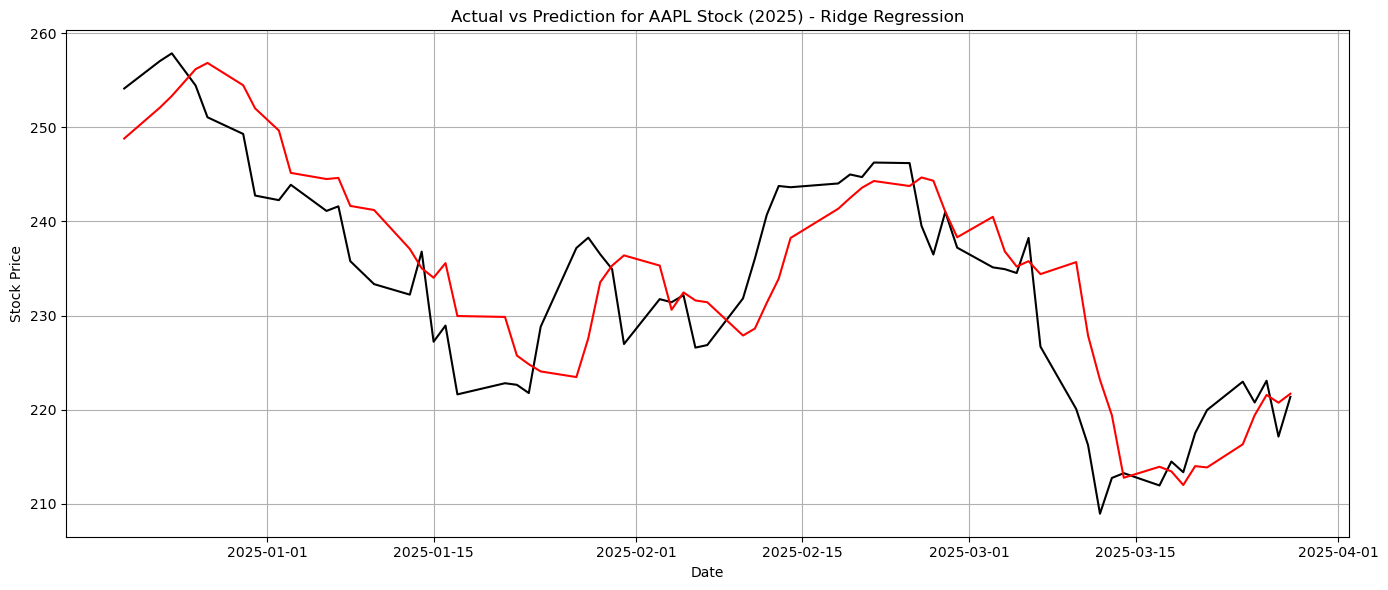

In [57]:
# Step 8: Plot Actual & Predicted Values
import matplotlib.pyplot as plt
plt.figure(figsize = (14,6))
plt.plot(df_result.index, df_result['Actual'], label = 'Actual', color = 'black')
plt.plot(df_result.index, df_result['Predicted'], label = 'Predicted', color = 'red')
plt.title("Actual vs Prediction for AAPL Stock (2025) - Ridge Regression")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [58]:
# Step 9: Evaluate the Model - R square, mse, rmse
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(Y_test, y_pred)
print("R square", r2)
mse = mean_squared_error(Y_test, y_pred)
print("mse",mse)
rmse = np.sqrt(mse)
print("rmse", rmse)

R square 0.7443735142143721
mse 35.91298447768754
rmse 5.992744319398879


In [59]:
# Elastic Net - Lasso + Ridge

**Elastic Net Regression**

In [60]:
# Step 1: Import all the required libraries
# Step 2: Define Features and Target Variables
# Step 3: Train Test Split
# Step 4: Apply Elastic Net Regression
# Step 5: Get Intercept and Coeff for Elastic Net Regression
# Step 6: Predict using Elastic Net Regression
# Step 7: Create a dataframe with Actual and Predicted Values
# Step 8: Plot Actual & Predicted Values
# Step 9: Evaluate the Model - R square, mse, rmse

In [61]:
# Step 1: Import all the required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [62]:
# Step 2: Define Features and Target Variables
X = df[['AAPL(t-1)', 'AMZN(t-1)',
 'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL_MA_5', 'AMZN_MA_5',
 'MSFT_MA_5', 'QQQ_MA_5', '^GSPC_MA_5']]

Y = df['Target']

In [63]:
# Step 3: Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.05, shuffle = False)


In [64]:
# Step 4: Apply Elastic Net Regression
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 1, l1_ratio = 0.5)
elastic_net.fit(X_train, Y_train) #Train the model
# alpha = 1, alpha control the strength of regularization (higher alpha = stronger penalty) - lambda parameter
# l1_ratio = 0.5 => applying 50% lasso and 50% as ridge regression - alpha parameter (theory)

C:\Users\Naitik Patel\anaconda11\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.435e+03, tolerance: 2.116e+02
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=1)

In [66]:
# Step 5: Get Intercept and Coeff for Elastic Net Regression
coefficients = elastic_net.coef_
coefficients
intercept = elastic_net.intercept_
intercept
coeff_df = pd.DataFrame({'Feature':X.columns, 'Coefficients':coefficients})
coeff_df

,Feature,Coefficients
0,AAPL(t-1),0.529396
1,AMZN(t-1),0.000296
2,MSFT(t-1),0.010737
3,QQQ(t-1),0.002956
4,^GSPC(t-1),0.006578
5,AAPL_MA_5,0.447807
6,AMZN_MA_5,0.000000
7,MSFT_MA_5,0.000000
8,QQQ_MA_5,0.000000
9,^GSPC_MA_5,-0.006775


In [67]:
# Step 6: Predict using Elastic Net Regression
y_pred = elastic_net.predict(X_test)
y_pred

array([248.66150537, 252.07971266, 253.21076161, 256.00832961,
       256.78623262, 254.2651965 , 251.66915991, 249.4685787 ,
       244.61891093, 243.97322656, 244.22701528, 241.49465755,
       241.26929913, 236.84684726, 234.72691285, 233.7205131 ,
       235.679345  , 229.65981921, 229.69386138, 225.00381785,
       224.58925929, 224.01062928, 223.36278082, 227.72996779,
       234.12774397, 235.77197086, 236.02408257, 234.84303385,
       229.82695472, 232.02746945, 231.61745798, 231.46733376,
       227.94815585, 228.36810923, 231.42006493, 234.24968057,
       238.57902314, 241.59523257, 242.63175086, 243.70464591,
       244.54843511, 243.9958725 , 245.01829077, 244.57034793,
       240.66048043, 238.05212342, 240.50203428, 236.92529247,
       235.08436991, 235.55211211, 234.56638312, 236.09687083,
       227.69261796, 222.56554523, 218.75924184, 212.21602428,
       213.85245383, 213.58437874, 212.15681814, 214.16940522,
       213.8587996 , 216.61724385, 219.39328178, 221.58

In [68]:
# Step 7: Create a dataframe with Actual and Predicted Values
df_result = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df_result

,Actual,Predicted
Date,,
2024-12-20,254.120682,248.661505
2024-12-23,257.037476,252.079713
2024-12-24,257.853790,253.210762
2024-12-26,254.439224,256.008330
2024-12-27,251.064484,256.786233
...,...,...
2025-03-24,222.987488,216.617244
2025-03-25,220.775055,219.393282
2025-03-26,223.087173,221.588944


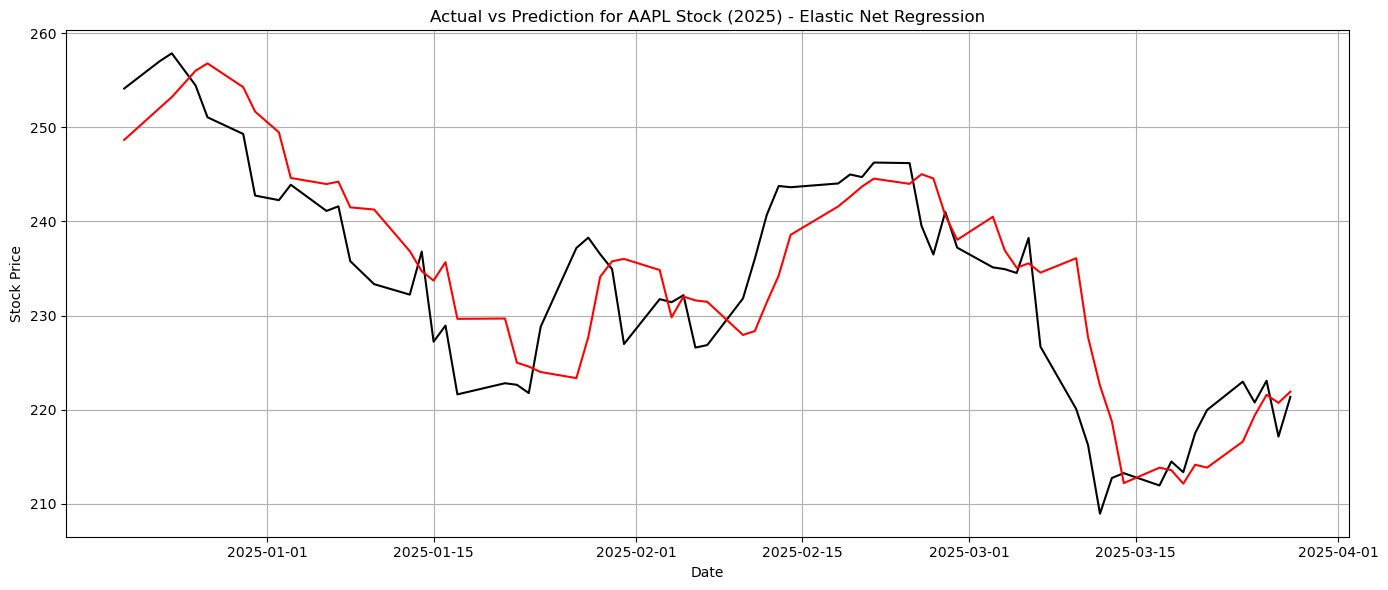

In [71]:
# Step 8: Plot Actual & Predicted Values
import matplotlib.pyplot as plt

plt.figure(figsize = (14,6))
plt.plot(df_result.index, df_result['Actual'], label = 'Actual', color = 'black')
plt.plot(df_result.index, df_result['Predicted'], label = 'Predicted', color = 'red')
plt.title("Actual vs Prediction for AAPL Stock (2025) - Elastic Net Regression")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [72]:
# Step 9: Evaluate the Model - R square, mse, rmse
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(Y_test, y_pred)
print("R square", r2)

mse = mean_squared_error(Y_test, y_pred)
print("mse",mse)

rmse = np.sqrt(mse)
print("rmse", rmse)

R square 0.7513316262940503
mse 34.935438781108
rmse 5.910620845656402


In [73]:
# Performance for All our Models

In [74]:
# OLS
# R-squared:0.993
# mse 17.35226637043703
# rmse 4.165605162570864 

In [75]:
# Lasso Regression
# R square 0.6745742009648297
# mse 33.88523829601259
# rmse 5.82110284190312

In [76]:
# Ridge Regression
# R square 0.6552348986780858
# mse 35.898959606393746
# rmse 5.9915740508145054

In [77]:
# Elastic Net Regression
# R square 0.6638572193358945
# mse 35.0011531294005
# rmse 5.9161772395188175